## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie, to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C_1$<br>
$C_{2n} = lm+1 + (255-lm-1)*C_2$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'
fileName = 'jet.bmp'

if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects = True)
    open(fileName, 'wb').write(r.content)

jet = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

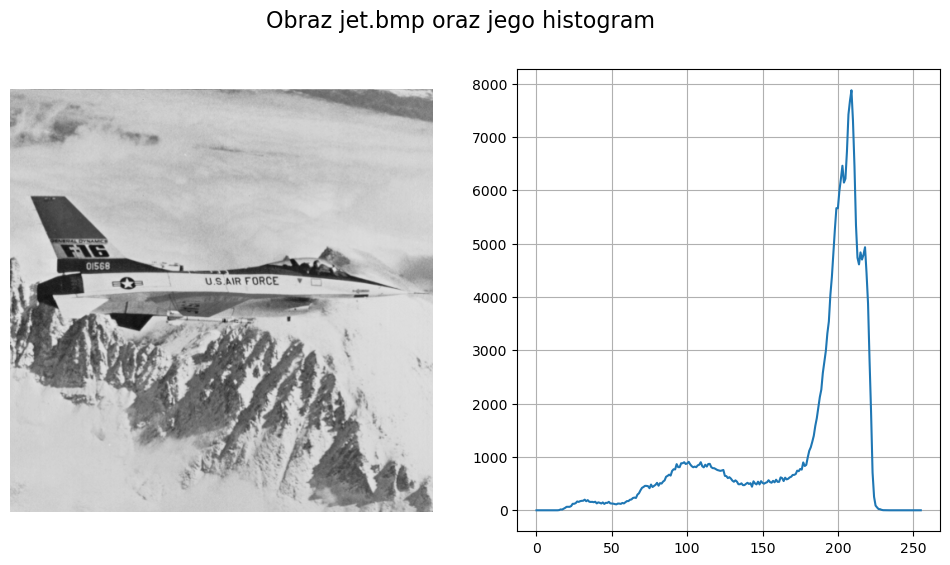

In [2]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.suptitle("Obraz jet.bmp oraz jego histogram", fontsize = 16)

hist = cv2.calcHist([jet], [0], None, [256], [0, 256])
axs[0].imshow(jet, 'gray', vmin = 0, vmax = 256)
axs[0].axis('off')
axs[1].plot(hist)
axs[1].grid()

In [3]:
lm_BBHE = np.uint(np.mean(jet))

hist_cum = hist.cumsum()
aux = np.abs(hist_cum - 0.5 * hist_cum.max())
lm_DSIHE = np.argmin(aux)

Text(0.5, 1.0, 'Histogram H2')

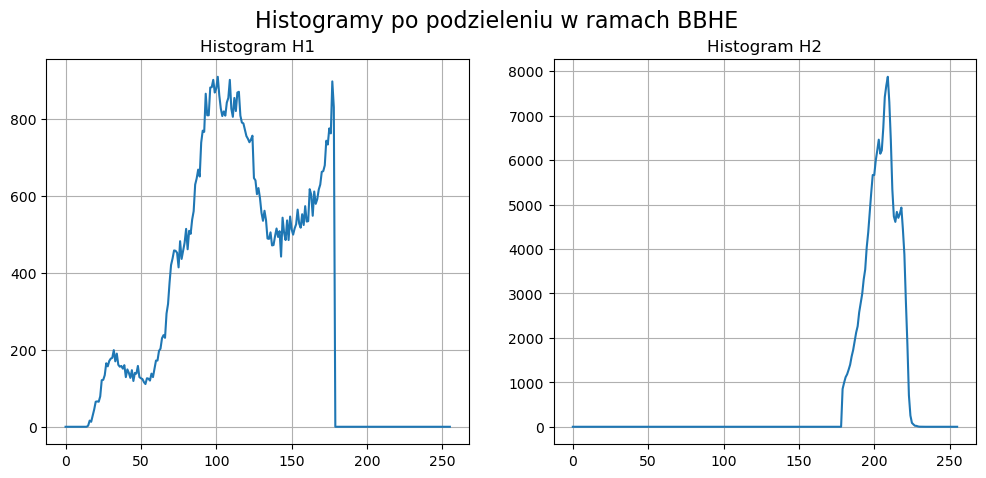

In [4]:
h1_BBHE = np.vstack((hist[:lm_BBHE + 1], np.zeros((hist.shape[0] - lm_BBHE - 1, 1))))
h2_BBHE = np.vstack((np.zeros((lm_BBHE + 1, 1)), hist[lm_BBHE + 1:]))

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle("Histogramy po podzieleniu w ramach BBHE", fontsize = 16)

axs[0].plot(h1_BBHE)
axs[0].grid()
axs[0].set_title("Histogram H1")

axs[1].plot(h2_BBHE)
axs[1].grid()
axs[1].set_title("Histogram H2")

Text(0.5, 1.0, 'Histogram H2')

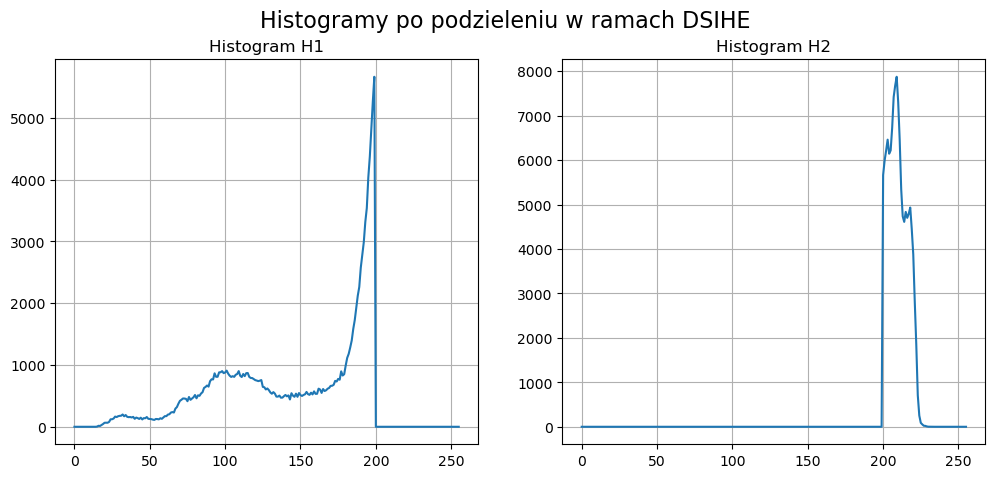

In [5]:
h1_DSIHE = np.vstack((hist[:lm_DSIHE + 1], np.zeros((hist.shape[0] - lm_DSIHE - 1, 1))))
h2_DSIHE = np.vstack((np.zeros((lm_DSIHE + 1, 1)), hist[lm_DSIHE + 1:]))

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle("Histogramy po podzieleniu w ramach DSIHE", fontsize = 16)

axs[0].plot(h1_DSIHE)
axs[0].grid()
axs[0].set_title("Histogram H1")

axs[1].plot(h2_DSIHE)
axs[1].grid()
axs[1].set_title("Histogram H2")

Text(0.5, 1.0, 'Histogram skumulowany C2')

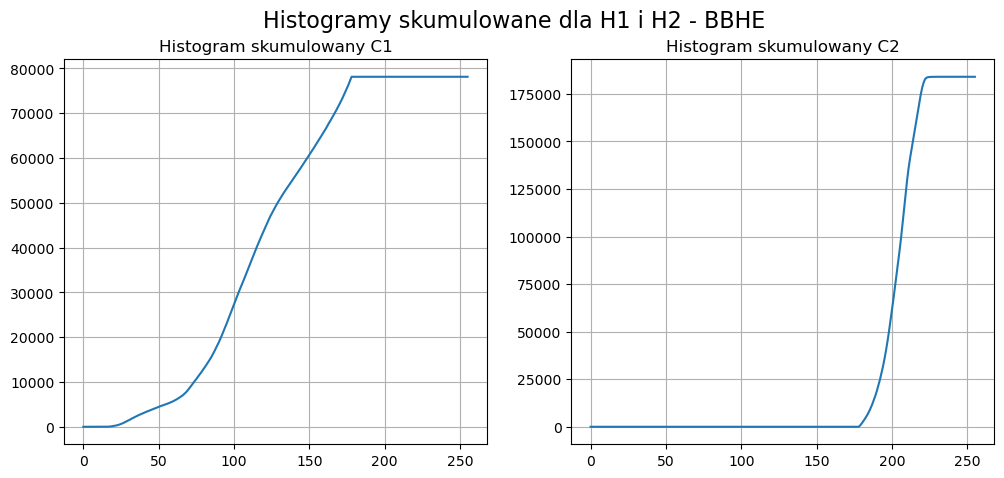

In [6]:
c1_BBHE = h1_BBHE.cumsum()
c2_BBHE = h2_BBHE.cumsum()

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle("Histogramy skumulowane dla H1 i H2 - BBHE", fontsize = 16)

axs[0].plot(c1_BBHE)
axs[0].grid()
axs[0].set_title("Histogram skumulowany C1")

axs[1].plot(c2_BBHE)
axs[1].grid()
axs[1].set_title("Histogram skumulowany C2")

Text(0.5, 1.0, 'Histogram skumulowany C2')

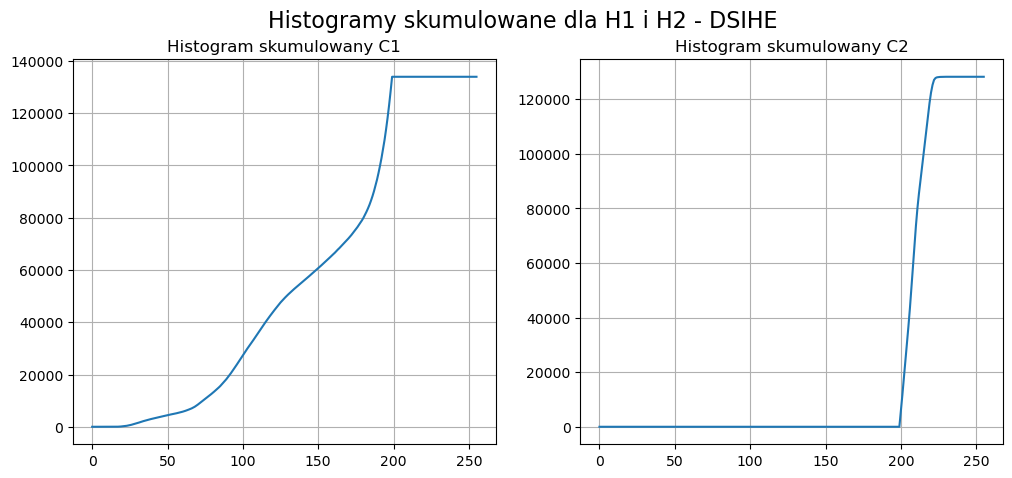

In [7]:
c1_DSIHE = h1_DSIHE.cumsum()
c2_DSIHE = h2_DSIHE.cumsum()

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle("Histogramy skumulowane dla H1 i H2 - DSIHE", fontsize = 16)

axs[0].plot(c1_DSIHE)
axs[0].grid()
axs[0].set_title("Histogram skumulowany C1")

axs[1].plot(c2_DSIHE)
axs[1].grid()
axs[1].set_title("Histogram skumulowany C2")

In [8]:
c1_BBHE_norm = c1_BBHE / c1_BBHE.max()
c2_BBHE_norm = c2_BBHE / c2_BBHE.max()
c1_DSIHE_norm = c1_DSIHE / c1_DSIHE.max()
c2_DSIHE_norm = c2_DSIHE / c2_DSIHE.max()

In [9]:
c1_BBHE_scaled = c1_BBHE_norm * lm_BBHE
c2_BBHE_scaled = lm_BBHE + 1 + (255 - lm_BBHE - 1) * c2_BBHE_norm
c1_DSIHE_scaled = c1_DSIHE_norm * lm_DSIHE
c2_DSIHE_scaled = lm_DSIHE + 1 + (255 - lm_DSIHE - 1) * c2_DSIHE_norm

lut_BBHE = np.hstack((c1_BBHE_scaled[:lm_BBHE + 1], c2_BBHE_scaled[lm_BBHE + 1:]))
lut_DSIHE = np.hstack((c1_DSIHE_scaled[:lm_DSIHE + 1], c2_DSIHE_scaled[lm_DSIHE + 1:]))

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

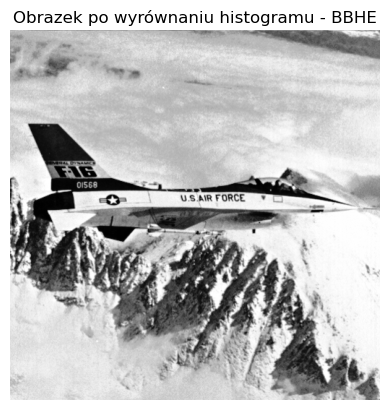

In [10]:
LUT = np.round(lut_BBHE)
jet_BBHE = cv2.LUT(jet, LUT)

plt.title("Obrazek po wyrównaniu histogramu - BBHE")
plt.imshow(jet_BBHE, 'gray', vmin = 0, vmax = 256)
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

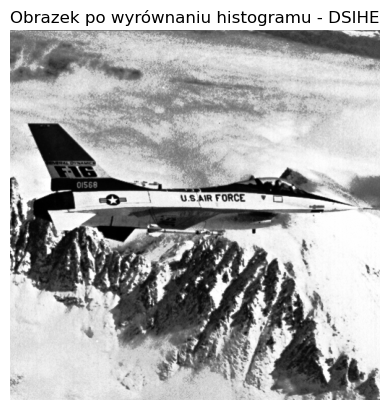

In [11]:
LUT = np.round(lut_DSIHE)
jet_DSIHE = cv2.LUT(jet, LUT)

plt.title("Obrazek po wyrównaniu histogramu - DSIHE")
plt.imshow(jet_DSIHE, 'gray', vmin = 0, vmax = 256)
plt.axis('off')

Text(0.5, 1.0, 'DSIHE')

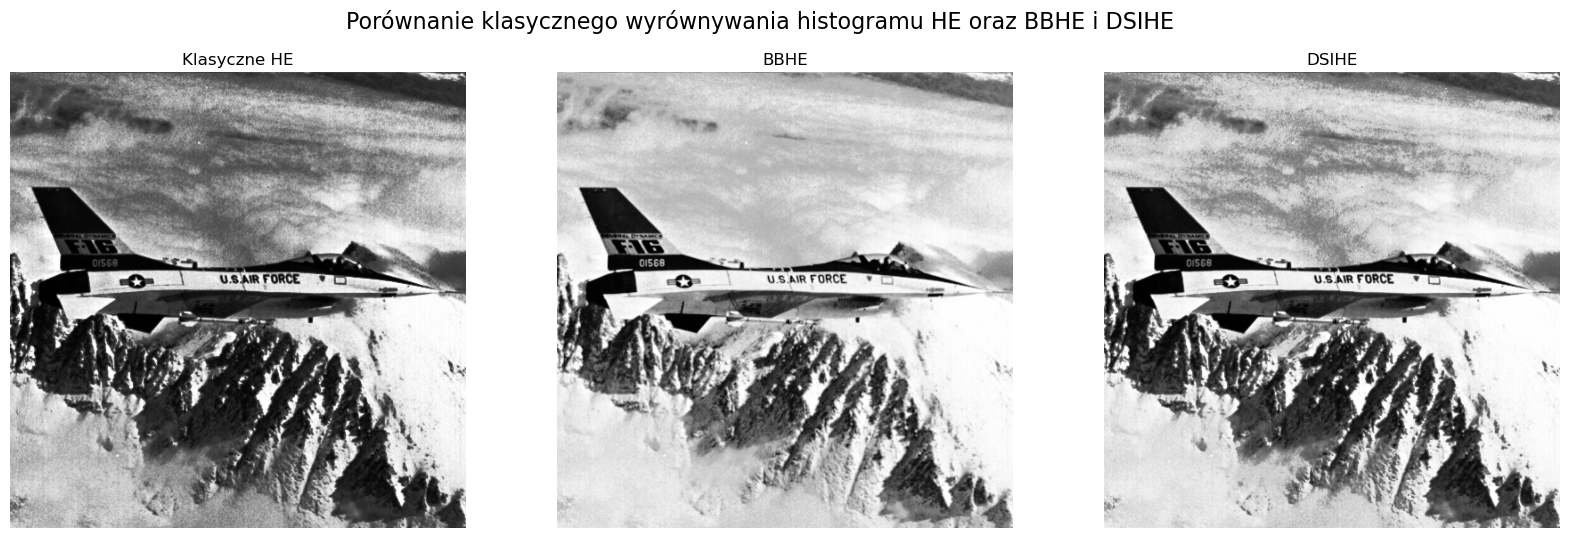

In [12]:
jet_HE = cv2.equalizeHist(jet)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 6)
fig.suptitle("Porównanie klasycznego wyrównywania histogramu HE oraz BBHE i DSIHE", fontsize = 16)

axs[0].imshow(jet_HE, 'gray', vmin = 0, vmax = 256)
axs[0].axis('off')
axs[0].set_title("Klasyczne HE")

axs[1].imshow(jet_BBHE, 'gray', vmin = 0, vmax = 256)
axs[1].axis('off')
axs[1].set_title("BBHE")

axs[2].imshow(jet_DSIHE, 'gray', vmin = 0, vmax = 256)
axs[2].axis('off')
axs[2].set_title("DSIHE")